# Deep Recurrent Neural Networks


:label:`chapter_deep_rnn`


Up to now, we only discussed recurrent neural networks with a single unidirectional hidden layer. In it the specific functional form of how latent variables and observations interact was rather arbitrary. This isn't a big problem as long as we have enough flexibility to model different types of interactions. With a single layer, however, this can be quite challenging. In the case of the perceptron we fixed this problem by adding more layers. Within RNNs this is a bit more tricky, since we first need to decide how and where to add extra nonlinearity. Our discussion below focuses primarily on LSTMs but it applies to other sequence models, too.

* We could add extra nonlinearity to the gating mechanisms. That is, instead of using a single perceptron we could use multiple layers. This leaves the *mechanism* of the LSTM unchanged. Instead it makes it more sophisticated. This would make sense if we were led to believe that the LSTM mechanism describes some form of universal truth of how latent variable autoregressive models work.
* We could stack multiple layers of LSTMs on top of each other. This results in a mechanism that is more flexible, due to the combination of several simple layers. In particular, data might be relevant at different levels of the stack. For instance, we might want to keep high-level data about financial market conditions (bear or bull market) available at a high level, whereas at a lower level we only record shorter-term temporal dynamics.

Beyond all this abstract discussion it is probably easiest to understand the family of models we are interested in by reviewing the diagram below. It describes a deep recurrent neural network with $L$ hidden layers. Each hidden state is continuously passed to the next time step of the current layer and the next layer of the current time step.

![ Architecture of a deep recurrent neural network. ](../img/deep-rnn.svg)

## Functional Dependencies

At time step $t$ we assume that we have a minibatch $\mathbf{X}_t \in \mathbb{R}^{n \times d}$ (number of examples: $n$, number of inputs: $d$). The hidden state of hidden layer $\ell$ ($\ell=1,\ldots,T$) is $\mathbf{H}_t^{(\ell)}  \in \mathbb{R}^{n \times h}$ (number of hidden units: $h$), the output layer variable is $\mathbf{O}_t \in \mathbb{R}^{n \times q}$ (number of outputs: $q$) and a hidden layer activation function $f_l$ for layer $l$. We compute the hidden state of layer $1$ as before, using $\mathbf{X}_t$ as input. For all subsequent layers the hidden state of the previous layer is used in its place.

$$\begin{aligned}
\mathbf{H}_t^{(1)} & = f_1\left(\mathbf{X}_t, \mathbf{H}_{t-1}^{(1)}\right) \\
\mathbf{H}_t^{(l)} & = f_l\left(\mathbf{H}_t^{(l-1)}, \mathbf{H}_{t-1}^{(l)}\right)
\end{aligned}$$

Finally, the output of the output layer is only based on the hidden state of hidden layer $L$. We use the output function $g$ to address this:

$$\mathbf{O}_t = g \left(\mathbf{H}_t^{(L)}\right)$$

Just as with multilayer perceptrons, the number of hidden layers $L$ and number of hidden units $h$ are hyper parameters. In particular, we can pick a regular RNN, a GRU or an LSTM to implement the model.

## Concise Implementation

Fortunately many of the logistical details required to implement multiple layers of an RNN are readily available in Gluon. To keep things simple we only illustrate the implementation using such built-in functionality. The code is very similar to the one we used previously for LSTMs. In fact, the only difference is that we specify the number of layers explicitly rather than picking the default of a single layer. Let's begin by importing the appropriate modules and data.

In [1]:
#import d2l
from mxnet import nd
from mxnet.gluon import rnn
import sys
sys.path.append("..")
import d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

The architectural decisions (parameters, etc.) are very similar to those of previous sections. We pick the same number of inputs and outputs as we have distinct tokens, i.e. `vocab_size`. The number of hidden units is still 256. The only difference is that we now select a nontrivial number of layers `num_layers = 2`. Since the model is somewhat slower to train we use 3000 iterations.

In [2]:
vocab_size, num_hiddens, num_layers, ctx = len(vocab), 256, 2, d2l.try_gpu()
lstm_layer = rnn.LSTM(num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))


## Training

The actual invocation logic is identical to before. The only difference is that we now instantiate two layers with LSTMs. This rather more complex architecture and the large number of epochs slow down training considerably.

Perplexity 16.1, 11103 tokens/sec on cpu(0)
time traveller to  ae  ae  ae  ae  ae  ae  ae  ae  ae  ae  ae  a
traveller to  ae  ae  ae  ae  ae  ae  ae  ae  ae  ae  ae  a


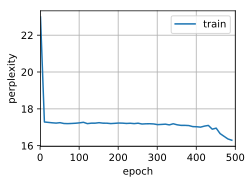

In [3]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, ctx)

Perplexity 8.2, 42991 tokens/sec on cpu(0)
time traveller an the thing the time traveller aming an the thin
traveller an the thing the time traveller aming an the thin


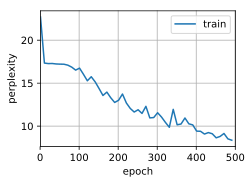

In [4]:
vocab_size, num_hiddens, num_layers, ctx = len(vocab), 256, 2, d2l.try_gpu()
lstm_layer = rnn.RNN(num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, ctx)

Perplexity 17.2, 23286 tokens/sec on cpu(0)
time traveller                                                  
traveller                                                  


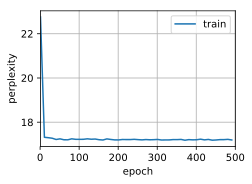

In [5]:
vocab_size, num_hiddens, num_layers, ctx = len(vocab), 256, 4, d2l.try_gpu()
lstm_layer = rnn.RNN(num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, ctx)

Perplexity 17.2, 33959 tokens/sec on cpu(0)
time traveller                                                  
traveller                                                  


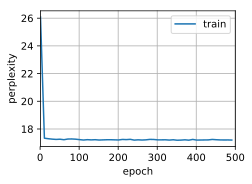

In [6]:
vocab_size, num_hiddens, num_layers, ctx = len(vocab), 256, 2, d2l.try_gpu()
lstm_layer = rnn.RNN(num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
num_epochs, lr = 500, 1
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, ctx)

## Summary

* In deep recurrent neural networks, hidden state information is passed to the next time step of the current layer and the next layer of the current time step.
* There exist many different flavors of deep RNNs, such as LSTMs, GRUs or regular RNNs. Conveniently these models are all available as parts of the `rnn` module in Gluon.
* Initialization of the models requires care. Overall, deep RNNs require considerable amount of work (learning rate, clipping, etc) to ensure proper convergence.

## Exercises

1. Try to implement a two-layer RNN from scratch using the single layer implementation we discussed in :numref:`chapter_rnn_scratch`.
2. Replace the LSTM by a GRU and compare the accuracy.
3. Increase the training data to include multiple books. How low can you go on the perplexity scale?
4. Would you want to combine sources of different authors when modeling text? Why is this a good idea? What could go wrong?

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2369)

![](../img/qr_deep-rnn.svg)